In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

df = pd.read_csv('text.csv')


In [7]:
df.tail()

,Unnamed: 0,text,label
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3
416808,416808,i think that after i had spent some time inves...,5


In [8]:
# Define the mapping between emotion labels and sentiment labels
emotion_to_sentiment = {
    0: 0,  # sadness
    1: 1,  # joy
    2: 1,  # love
    3: 0,  # anger
    4: 2,   # fear
    5: 2    # surprise
}

# Map emotion labels to sentiment labels and create a new column 'sentiment'
df['sentiment'] = df['label'].map(emotion_to_sentiment)

# Print the first few rows to check the result
print(df.head())


   Unnamed: 0                                               text  label  \
0           0      i just feel really helpless and heavy hearted      4   
1           1  ive enjoyed being able to slouch about relax a...      0   
2           2  i gave up my internship with the dmrg and am f...      4   
3           3                         i dont know i feel so lost      0   
4           4  i am a kindergarten teacher and i am thoroughl...      4   

   sentiment  
0          2  
1          0  
2          2  
3          0  
4          2  


In [9]:
df.tail()

,Unnamed: 0,text,label,sentiment
416804,416804,i feel like telling these horny devils to find...,2,1
416805,416805,i began to realize that when i was feeling agi...,3,0
416806,416806,i feel very curious be why previous early dawn...,5,2
416807,416807,i feel that becuase of the tyranical nature of...,3,0
416808,416808,i think that after i had spent some time inves...,5,2


In [10]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
custom_stopwords = [
    "i","im","like", "feel", "feeling", "my", "the", "to",
                     "for","know","littl","think","time","thing","would","go",
                     "realli","feel","am","so","get", "one", "to", "and", "at", "can",
                     "day","way", "make", "me", "want", "could" , "would", "tri", "u"                      
                     ]


all_stopwords=stopwords.words('english') + custom_stopwords

print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
import re
import preprocessor as p
from nltk.stem import PorterStemmer


#  function to clean text data
def preprocessing(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove all non-word characters
    text = re.sub(r'\s+', ' ', text)  # Replace all runs of whitespaces with a single space
    # Optionally, remove stopwords and stem
    words = text.split()
    words = [word for word in words if word not in all_stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)



In [14]:
new_data = df["text"].apply(preprocessing)

new_data = pd.DataFrame(new_data)

new_data.head()

,text
0,realli helpless heavi heart
1,ive enjoy abl slouch relax unwind frankli need...
2,gave internship dmrg distraught
3,dont lost
4,kindergarten teacher thoroughli weari job take...


In [15]:
df["preprocessing"] = new_data

#compare normal and preprocessed data
df.head(10)

,Unnamed: 0,text,label,sentiment,preprocessing
0,0,i just feel really helpless and heavy hearted,4,2,realli helpless heavi heart
1,1,ive enjoyed being able to slouch about relax a...,0,0,ive enjoy abl slouch relax unwind frankli need...
2,2,i gave up my internship with the dmrg and am f...,4,2,gave internship dmrg distraught
3,3,i dont know i feel so lost,0,0,dont lost
4,4,i am a kindergarten teacher and i am thoroughl...,4,2,kindergarten teacher thoroughli weari job take...
5,5,i was beginning to feel quite disheartened,0,0,begin quit dishearten
6,6,i would think that whomever would be lucky eno...,2,1,whomev lucki enough stay suit must romant plac...
7,7,i fear that they won t ever feel that deliciou...,1,1,fear ever delici excit christma eve least rememb
8,8,im forever taking some time out to have a lie ...,5,2,forev take lie weird
9,9,i can still lose the weight without feeling de...,0,0,still lose weight without depriv


In [16]:
positive_data = df[df['sentiment'] == 1]['preprocessing'].tolist()
negative_data = df[df['sentiment'] == 0]['preprocessing'].tolist()
neutral_data = df[df['sentiment'] == 2]['preprocessing'].tolist()


In [17]:
import random

# Display a sample of the positive data
sample_positive_data = random.sample(positive_data, 10)  # Sample 10 elements
print(sample_positive_data)

['never forget stand cotton halter neck dress almost slightli outsid bodi keep calm wait walk say sorri', 'quit mellow zen yet real urg yell big ol fuck human race gener', 'accept polici hold true winter', 'see come clear home play arm forc smug', 'longer accept claim problem', 'nostalg today sinc guarante rememb nonsens wrote superstorm sandi go post favorit storm bit wrote last year', 'pick dress alway make cute whack stilt', 'look perfect', 'passion subject ill write post discuss everyon join', 'inspir attitud toward ambit also aim fabric hard work attitud order achiev aim futur']


In [18]:
import random

# Display a sample of the negative data
sample_negative_data = random.sample(negative_data, 10)  # Sample 10 elements
print(sample_negative_data)

['defeat alon seem helpless plan plane sunset nowher land see never happi sand castl spend collaps let hear', 'dont call needi badgr visit', 'today yesterday ive gain back everi pound ive lost', 'disgust tell puni fuck ident ok', 'someth intens feroci war wage evid unseen seen realm affect worship gener', 'sat bed eat rees peanut butter cup contempl write next blog post slightli frustrat noth come mind', 'dont unhappi stay home', 'still awkward', 'read littl cold hard heart dont intend', 'train hurt rest']


In [19]:
pip install wordcloud



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


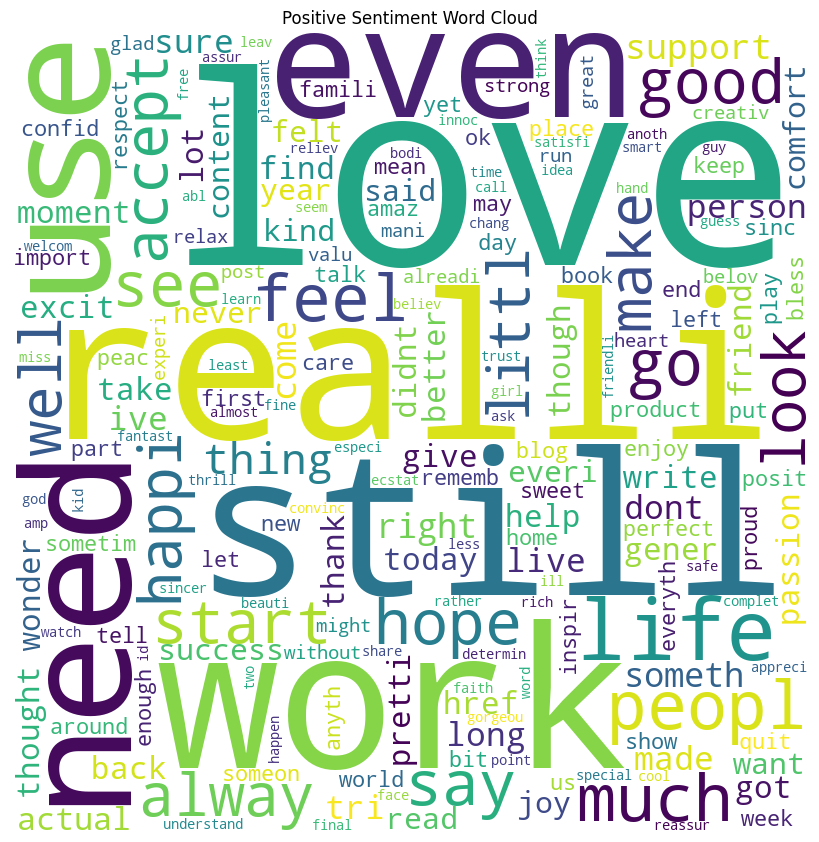

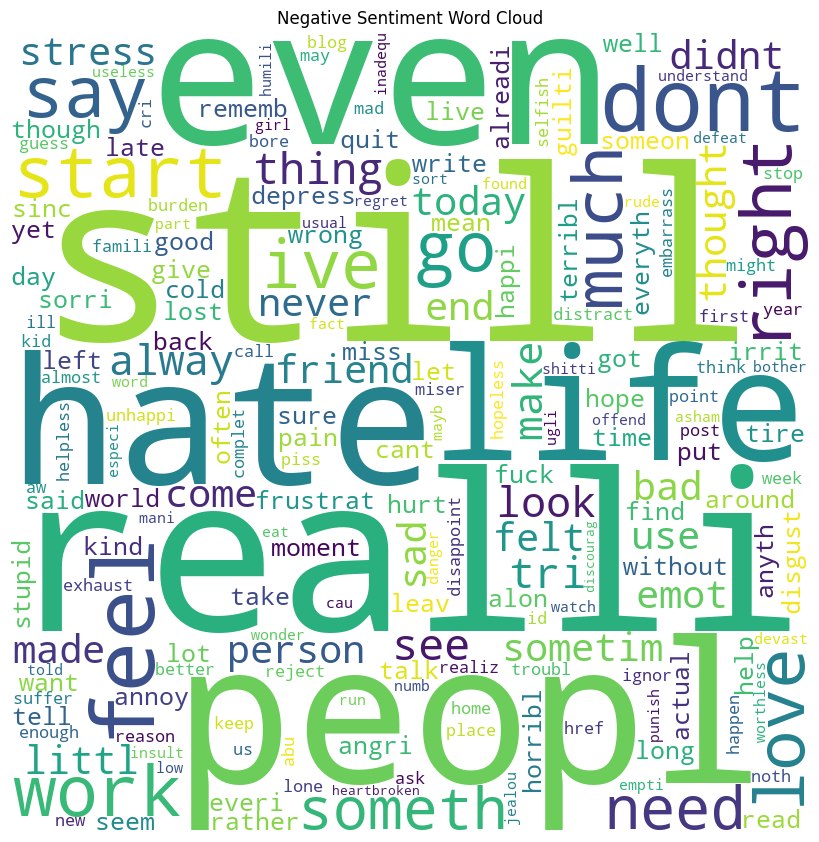

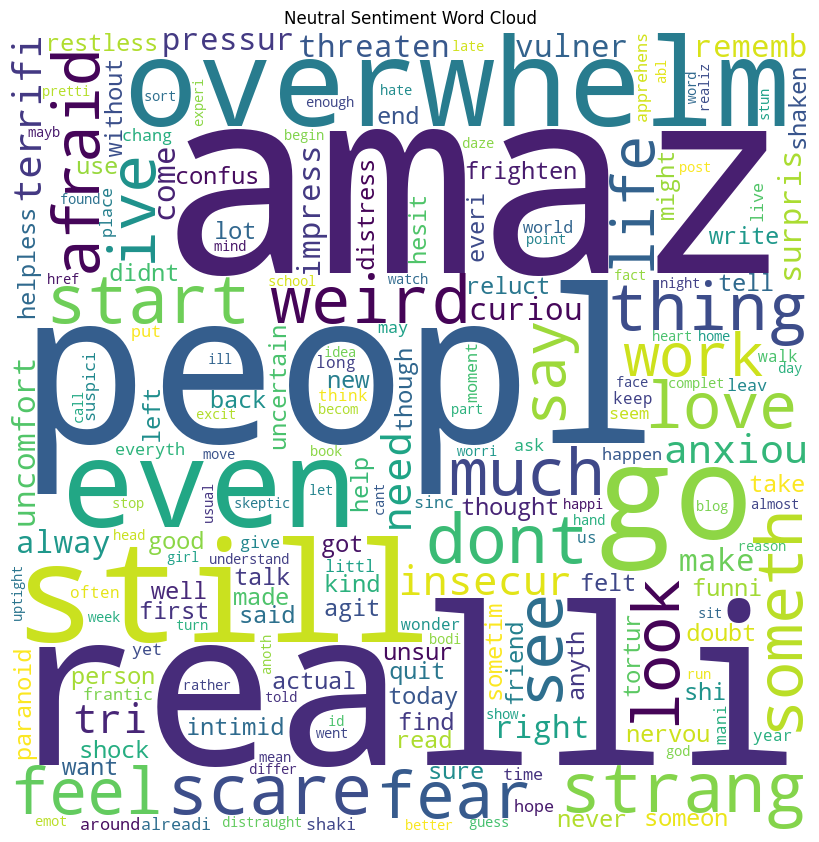

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have three separate datasets: positive_data, negative_data, and neutral_data
# Each dataset contains the text data corresponding to its sentiment label

# Define function to generate word cloud
def generate_wordcloud(text_data, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text_data)
    
    # Plot word cloud
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
  
    plt.show() 

# Generate word clouds for each sentiment category
generate_wordcloud(' '.join(positive_data), "Positive Sentiment Word Cloud")
generate_wordcloud(' '.join(negative_data), "Negative Sentiment Word Cloud")
generate_wordcloud(' '.join(neutral_data), "Neutral Sentiment Word Cloud")


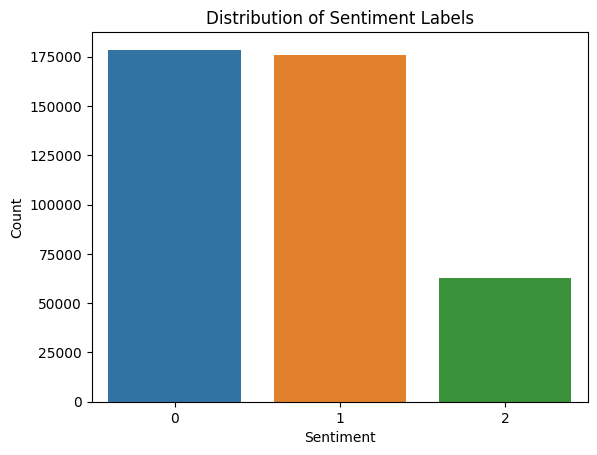

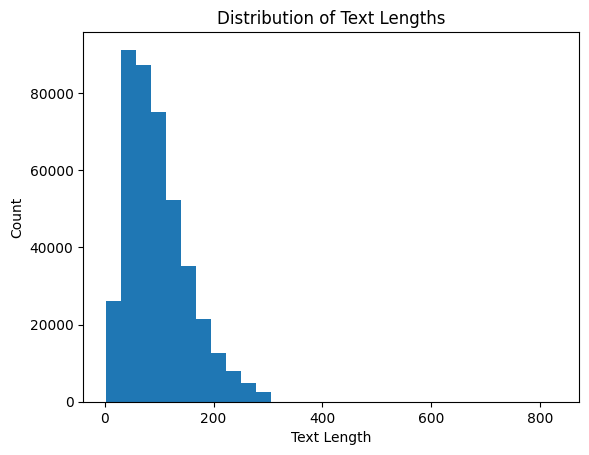

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
# Assuming df is your DataFrame containing the preprocessed data
# df = pd.read_csv('preprocessed_data.csv')

# Explore the distribution of sentiment labels
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Explore the distribution of text lengths
df['text_length'] = df['text'].apply(len)
plt.hist(df['text_length'], bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


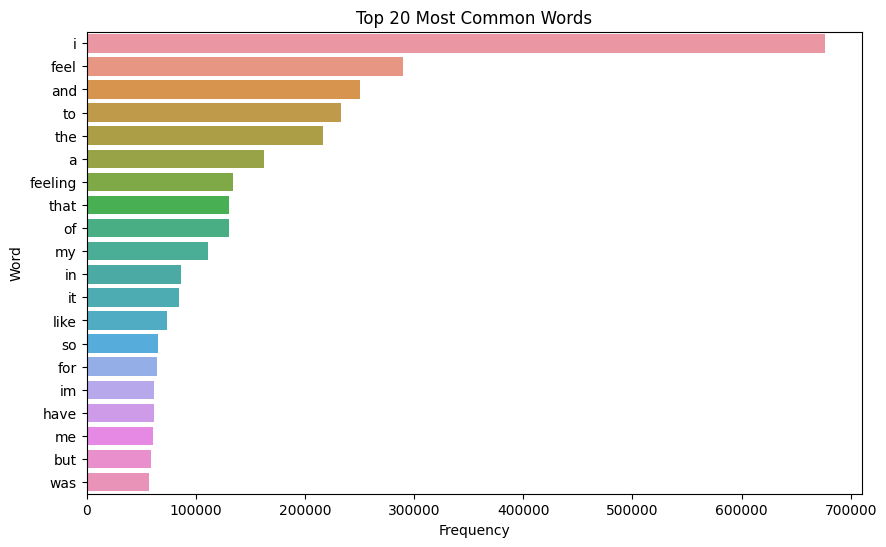

In [22]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

# Tokenize the text data
df['tokens'] = df['text'].apply(word_tokenize)

# Explore word frequency in the dataset
words = [word for sublist in df['tokens'] for word in sublist]
word_freq = Counter(words)
common_words = word_freq.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df)
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()
